In [1055]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [1056]:
data = pd.read_csv('Spectrum_ground_truth_v1')

In [1057]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [1058]:
data = data.loc[data['350'].notnull(), :]

In [1059]:
trait = 'SLA'

In [1060]:
df = data.loc[data[trait].notnull(), :]

In [1061]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
4,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.035746,0.035719,0.035662,0.035373,0.035116,0.034928,0.034894,0.035089,0.035207,0.035318
6,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.063127,0.062848,0.062419,0.061859,0.061757,0.061780,0.061694,0.061778,0.061602,0.061258
18,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.047240,0.047197,0.047097,0.047076,0.047109,0.047000,0.046865,0.046916,0.046800,0.046609
153,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.051336,0.051330,0.050878,0.050832,0.050811,0.050747,0.050927,0.050916,0.050690,0.050420
155,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.037923,0.038071,0.038045,0.038280,0.038452,0.038060,0.037492,0.037041,0.036808,0.036783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.047897,0.047782,0.047766,0.047935,0.047922,0.047873,0.047877,0.047550,0.047167,0.046907
2388,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.044129,0.043988,0.043800,0.043439,0.043239,0.043229,0.043340,0.043594,0.043514,0.043296
2389,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.053184,0.053091,0.052986,0.052769,0.052454,0.052359,0.052218,0.052067,0.051874,0.051651
2390,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.054906,0.054912,0.054887,0.054571,0.054200,0.053860,0.053767,0.053851,0.053684,0.053643


In [1062]:
#Identify x 
position_350 = df.columns.get_loc('350')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [1063]:
#Extracting the column names
col_names=X.columns

In [1064]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [1065]:
#drop first 100 column
X = X.drop(X.columns[0:100], axis=1)

In [1066]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [1067]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [1068]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(df['PLOT ID']))

In [1069]:
first_columns = df[['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD']]



In [1070]:
#merging GEM gt
df=pd.merge(first_columns, X, how='outer')

In [1071]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1005,7.73,366.00,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.044459,0.042922,0.041521,0.040042,0.038764,0.037882,0.036749,0.035767,0.035112,0.035336
1,1007,12.37,598.00,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.076053,0.073855,0.071431,0.069493,0.067616,0.066283,0.065054,0.063237,0.061748,0.061285
2,1019,15.13,535.00,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.054565,0.053394,0.051987,0.050874,0.049819,0.049170,0.048072,0.047340,0.047082,0.046629
3,1154,12.38,451.00,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.057561,0.056364,0.055173,0.053919,0.052950,0.052544,0.052102,0.051315,0.050781,0.050402
4,1156,15.98,621.00,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.045437,0.044465,0.042950,0.041319,0.040629,0.039683,0.038914,0.038143,0.038376,0.036775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.057304,0.055618,0.054255,0.052254,0.051160,0.050028,0.048961,0.048075,0.047927,0.046863
266,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.053143,0.051391,0.050009,0.048248,0.047225,0.045835,0.045225,0.044159,0.043247,0.043314
267,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.065332,0.063273,0.061116,0.059545,0.057473,0.055754,0.054691,0.053247,0.052504,0.051653
268,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.065816,0.063957,0.062021,0.060217,0.058768,0.057140,0.056466,0.055024,0.054189,0.053637


In [1072]:
brooke = pd.read_csv('Brooke_gt_merged')

In [1073]:
brooke

,Unnamed: 0,PLOT ID,Rep,Growth_Stage,Dry weight,Genotype,Location,CHL,LWC,SLA,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0,4135,1,2,1.28,PHZ51 x LH145,HIPS,315.200000,72.113290,223.906250,...,0.088730,0.085894,0.083152,0.080678,0.078854,0.076955,0.075087,0.073263,0.072115,0.071374
1,1,6276,1,2,1.57,PHZ51 x LH145,HIPS,337.366667,73.789649,219.363057,...,0.088612,0.086283,0.083992,0.081681,0.079566,0.078377,0.076761,0.075598,0.074248,0.074209
2,2,4234,1,2,2.35,B14A x Mo17,HIPS,373.733333,72.800926,191.106383,...,0.074625,0.072566,0.070213,0.068412,0.066544,0.064866,0.063345,0.062314,0.061026,0.060244
3,3,5210,1,2,2.13,B37 x OH43,HIPS,380.533333,69.352518,184.553991,...,0.088911,0.086438,0.084271,0.081878,0.080027,0.077910,0.076272,0.075005,0.073769,0.073111
4,4,4217,1,2,1.04,2FACC x 3IIH6,HIPS,169.666667,68.195719,206.923077,...,0.114748,0.111905,0.109119,0.106474,0.104296,0.102103,0.100318,0.098726,0.097211,0.096226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,6137,1,2,NaN,F42 x Mo17,HIPS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,280,6137,2,2,NaN,F42 x Mo17,HIPS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,281,6255,2,2,NaN,LH123HT x 3IIH6,HIPS,114.566667,NaN,NaN,...,0.145673,0.143063,0.140345,0.137016,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236
282,282,6261,2,2,NaN,B14A x Mo17,HIPS,444.900000,NaN,NaN,...,0.110756,0.109139,0.106557,0.103934,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403


In [1074]:
data_all = pd.concat([df, brooke])

In [1075]:
data_all.reset_index(inplace=True, drop=True)

In [1076]:
data_all

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Dry weight,Genotype,Location
0,1005,7.73,366.0,77.490298,210.344828,NaN,NaN,NaN,NaN,1.74,...,0.037882,0.036749,0.035767,0.035112,0.035336,NaN,NaN,NaN,NaN,NaN
1,1007,12.37,598.0,74.211803,187.460815,NaN,NaN,NaN,NaN,3.19,...,0.066283,0.065054,0.063237,0.061748,0.061285,NaN,NaN,NaN,NaN,NaN
2,1019,15.13,535.0,80.304032,179.530201,NaN,NaN,NaN,NaN,2.98,...,0.049170,0.048072,0.047340,0.047082,0.046629,NaN,NaN,NaN,NaN,NaN
3,1154,12.38,451.0,75.201939,146.905537,NaN,NaN,NaN,NaN,3.07,...,0.052544,0.052102,0.051315,0.050781,0.050402,NaN,NaN,NaN,NaN,NaN
4,1156,15.98,621.0,77.346683,171.546961,NaN,NaN,NaN,NaN,3.62,...,0.039683,0.038914,0.038143,0.038376,0.036775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,279.0,2.0,NaN,F42 x Mo17,HIPS
550,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,280.0,2.0,NaN,F42 x Mo17,HIPS
551,6255,4.39,248.8,NaN,NaN,114.566667,87.6,135.7,120.4,NaN,...,0.131491,0.129041,0.126676,0.124981,0.123236,281.0,2.0,NaN,LH123HT x 3IIH6,HIPS
552,6261,5.67,325.6,NaN,NaN,444.900000,304.2,525.9,504.6,NaN,...,0.099513,0.097904,0.095859,0.094690,0.093403,282.0,2.0,NaN,B14A x Mo17,HIPS


In [1116]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [1117]:
outlier_treatment(data_all[trait])

(118.0328578336197, 249.59978479353572)

In [1118]:
lowerbound,upperbound = outlier_treatment(data_all[trait])

In [1121]:
rm_index =data_all[(data_all[trait] < lowerbound) | (data_all[trait] > upperbound)].index
rm_index.size

11

In [1122]:
data_all.drop(rm_index, axis=0 ,inplace=True)

In [1123]:
df= data_all.loc[data_all[trait].notnull(),:]
y = df.loc[:, trait]

In [1124]:
position_350 = df.columns.get_loc('450')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [1125]:
#define the cv
cv = RepeatedKFold(n_splits=10, n_repeats=10)
mse = []

In [1126]:
#Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(np.sqrt(score))
    n_comb = mse.index(min(mse)) +1

Text(0.5, 1.0, 'SLA')

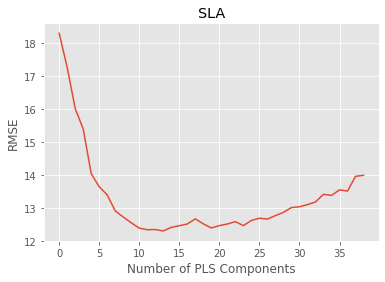

In [1127]:
#plot test MSE vs. number of components
plt.style.use('ggplot')
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title(trait)

In [1134]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.4) 

In [1135]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

PLSRegression(n_components=14)

In [1136]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

11.605111491606385

In [1137]:
y_pred = pls.predict(X_test)

Text(71, 78, 'r$^2$ = 0.57')

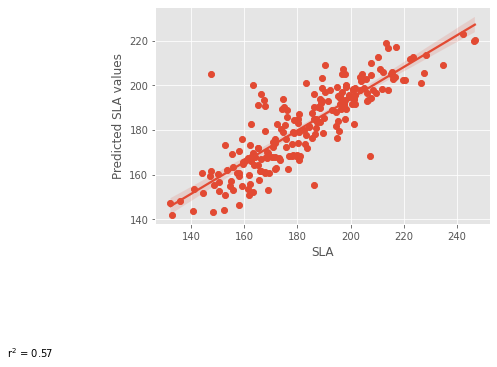

In [1138]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted' + ' ' + trait + ' ' + 'values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)
plt.text(x=71 , y=78 , s='r$^2$ = 0.57'  )

In [1139]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.7263138884812973 5.254390920900343e-61


In [1088]:
ytdf= pd.DataFrame(y_test)

In [1089]:
ytdf.reset_index(inplace=True)

In [1090]:
ypdf = pd.DataFrame(y_pred)

In [1091]:
ypdf.reset_index(inplace=True)

In [1092]:
merged =pd.concat([ytdf, ypdf], axis=1)

In [1093]:
diff = merged[trait]-merged[0]

In [1094]:
merged.insert(4, 'diff', diff)

In [1095]:
merged.sort_values(by='diff')[:50]

,index,SLA,index,0,diff
185,443,160.613027,185,231.469498,-70.856471
168,506,189.380531,168,224.081550,-34.701019
183,327,145.970149,183,180.000871,-34.030722
188,103,182.656827,188,211.955798,-29.298972
65,488,173.969466,65,199.520875,-25.551410
19,224,139.476965,19,164.776194,-25.299229
31,142,143.109244,31,164.841639,-21.732395
210,5,159.312321,210,180.312705,-21.000384
18,478,195.652174,18,215.270650,-19.618476
40,490,173.391304,40,192.149936,-18.758632
